<img src="../imgs/imageClassification.jpeg" style="width:1700px;">

# <center> 10. Image classification! </center>


## <span style="color:red"> Outline </span> 
1. **Working with an image dataset: mnist**
2. **Image classification**
3. **Image representation for classification**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## <span style="color:red"> 1. Working with an image dataset: mnists </span> 

**Load and explore the dataset!**

Mnist has a set of  handwritten digit images with an specific recognition task challenge. Each row has 785 values, the first column corresponds to the digitl label, and the 784 rest values is a vectorized image of $28 \times 28 $. So, we need to form $\mathbf{X}$ matrix and the corresponding $\mathbf{y}$ vector. Each pixel has an intensity of $[ 0 - 255 ]$

In [2]:
mnist = pd.read_csv("../data/mnist1.5k.csv.gz", header=None).values.astype(float)
print "dimension de los datos originales", mnist.shape
X=mnist[:,1:785]
y=mnist[:,0]
print "dimension de las imagenes y las clases", X.shape, y.shape
print "luminosidad maxima", np.max(X)
print "luminosidad minimo", np.min(X)

dimension de los datos originales (1500, 785)
dimension de las imagenes y las clases (1500, 784) (1500,)
luminosidad maxima 255.0
luminosidad minimo 0.0


Now, we will show some random examples of digits. We use `reshape` to convert a vector of 784 elements in a matrix of size: $(28 \times 28)$ and we interpolate to better visualize the images.

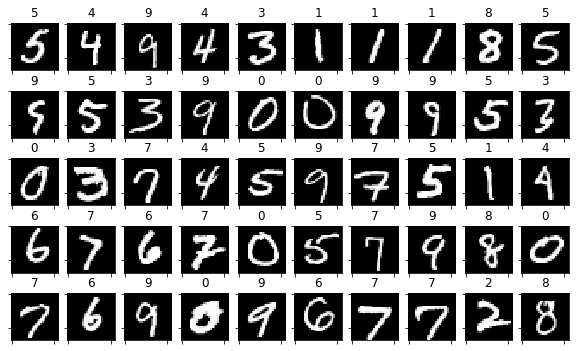

In [3]:
perm = np.random.permutation(range(X.shape[0]))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

Now we can see the distribution of classes, i.e., how many images we have for each digit

## <span style="color:orange">student</span>: 
- How is the distribution class?
- Is it a balanced dataset?

In [4]:
for i in np.unique(y):
    print i, np.sum(y==i)

0.0 150
1.0 157
2.0 186
3.0 125
4.0 151
5.0 138
6.0 152
7.0 154
8.0 141
9.0 146


In [5]:
print "digito   número de imágenes"
for i in np.unique(y):
    print "   ",int(i), "   ", np.sum(y==i)

digito   número de imágenes
    0     150
    1     157
    2     186
    3     125
    4     151
    5     138
    6     152
    7     154
    8     141
    9     146


## <span style="color:red"> 2. Image classification </span> 

** Training and prediction **
Firstly we use the **Naive Bayes** algorithm for classification. For fast evaluation, we split the dataset on $80\%$ for training and the rest $20 \%$ for test. 

## <span style="color:orange">student</span>: 
- How is the algorithm performance?
- Is it appropiate for digit classification
- In which digit classes has more mistakes?
- Why?

In [6]:
from sklearn.model_selection import train_test_split

test_size = 0.2
#by defautl is 0.25 in test.

d_train, d_test, c_train, c_test = train_test_split(X, y, test_size=test_size)
print d_train.shape, d_test.shape
print c_train.shape, c_test.shape

(1200, 784) (300, 784)
(1200,) (300,)


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

g = GaussianNB()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

cm_train=confusion_matrix(c_train, predicciones_train)
cm_test = confusion_matrix(c_test, predicciones_test)
print "matrix de confusión en train\n", cm_train
print "matrix de confusión en test\n", cm_test
print "verifica número de imágenes en total por fila"
print np.sum(cm_test, axis=1)

dimensiones train (1200, 784) (1200,)
dimsensions test  (300, 784) (300,)
acierto en train 0.715833333333
acierto en test  0.623333333333
matrix de confusión en train
[[120   0   0   0   0   0   2   0   0   1]
 [  0 122   1   0   0   0   0   0   1   0]
 [  4   4  52   8   1   7  47   1  22   1]
 [  5  12   0  55   1   8   4   1  12   7]
 [  3   2   0   0  68   4   5   0   6  30]
 [  9   2   1   0   1  82   3   0   8   6]
 [  0   0   0   0   0   0 116   0   1   0]
 [  0   2   0   0   0   0   0  53   2  71]
 [  0   8   0   1   1   3   3   0  77  16]
 [  0   1   1   0   0   0   0   0   1 114]]
matrix de confusión en test
[[24  0  1  0  0  0  0  1  1  0]
 [ 0 31  0  0  0  0  0  0  1  1]
 [ 0  1 13  2  2  6  9  0  6  0]
 [ 0  2  1  7  0  5  0  1  3  1]
 [ 0  0  1  1 17  0  3  1  3  7]
 [ 5  1  1  3  1  8  1  1  3  2]
 [ 0  0  1  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  7  1 18]
 [ 0  1  0  1  0  4  1  0 20  5]
 [ 1  0  0  0  1  0  0  1  0 26]]
verifica número de imágenes en total por fi

In [8]:
c_test

array([ 9.,  0.,  4.,  4.,  9.,  2.,  1.,  9.,  0.,  3.,  3.,  3.,  5.,
        4.,  1.,  6.,  8.,  8.,  9.,  4.,  1.,  0.,  7.,  0.,  1.,  7.,
        0.,  2.,  3.,  2.,  1.,  1.,  0.,  9.,  8.,  8.,  0.,  9.,  5.,
        8.,  7.,  2.,  2.,  8.,  7.,  2.,  9.,  5.,  6.,  6.,  2.,  7.,
        5.,  4.,  5.,  0.,  7.,  8.,  3.,  7.,  5.,  1.,  8.,  2.,  9.,
        8.,  6.,  5.,  4.,  4.,  8.,  5.,  8.,  8.,  0.,  6.,  0.,  5.,
        1.,  0.,  8.,  4.,  0.,  1.,  1.,  6.,  9.,  4.,  1.,  2.,  0.,
        6.,  4.,  6.,  2.,  8.,  4.,  1.,  6.,  9.,  1.,  3.,  8.,  4.,
        5.,  6.,  2.,  1.,  5.,  4.,  6.,  8.,  6.,  8.,  5.,  7.,  8.,
        0.,  9.,  2.,  4.,  9.,  1.,  4.,  7.,  2.,  6.,  2.,  8.,  2.,
        9.,  7.,  6.,  6.,  1.,  2.,  9.,  0.,  3.,  2.,  1.,  7.,  6.,
        9.,  4.,  6.,  6.,  4.,  9.,  7.,  4.,  6.,  5.,  0.,  2.,  7.,
        1.,  3.,  1.,  4.,  7.,  1.,  5.,  6.,  4.,  2.,  9.,  2.,  4.,
        6.,  1.,  8.,  5.,  9.,  7.,  4.,  4.,  7.,  2.,  7.,  2

In [9]:
predicciones_test

array([ 9.,  0.,  8.,  9.,  4.,  2.,  1.,  9.,  8.,  3.,  3.,  3.,  8.,
        4.,  1.,  6.,  8.,  8.,  9.,  4.,  1.,  0.,  9.,  0.,  1.,  9.,
        0.,  2.,  3.,  2.,  1.,  1.,  0.,  9.,  8.,  8.,  0.,  9.,  3.,
        9.,  9.,  8.,  8.,  5.,  8.,  5.,  9.,  6.,  6.,  6.,  2.,  9.,
        7.,  4.,  5.,  0.,  7.,  8.,  1.,  7.,  1.,  1.,  8.,  4.,  9.,
        8.,  6.,  9.,  2.,  9.,  9.,  5.,  8.,  8.,  0.,  6.,  0.,  5.,
        1.,  0.,  8.,  4.,  0.,  9.,  1.,  6.,  9.,  4.,  1.,  6.,  0.,
        6.,  4.,  6.,  2.,  5.,  4.,  1.,  6.,  9.,  1.,  5.,  1.,  3.,
        5.,  6.,  2.,  1.,  8.,  6.,  6.,  9.,  6.,  8.,  8.,  9.,  8.,
        0.,  9.,  5.,  6.,  9.,  1.,  4.,  9.,  6.,  6.,  6.,  8.,  6.,
        9.,  9.,  6.,  6.,  1.,  6.,  9.,  2.,  9.,  2.,  1.,  9.,  6.,
        7.,  4.,  6.,  6.,  8.,  9.,  7.,  7.,  6.,  5.,  0.,  2.,  9.,
        1.,  3.,  8.,  9.,  7.,  1.,  2.,  6.,  9.,  2.,  9.,  8.,  4.,
        6.,  1.,  8.,  9.,  9.,  9.,  8.,  9.,  9.,  6.,  7.,  2

cross validated classification

In [10]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *

s = cross_val_score(GaussianNB(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.603 (+/- 0.01925)


In [11]:
from sklearn.ensemble import RandomForestClassifier
s = cross_val_score(RandomForestClassifier(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.823 (+/- 0.02098)


## <span style="color:red"> 3. Image representation for classification </span> 

We can use hundreds of matemathical representations for images. For instance, we can use the histogram of gray levels. This representation is a vector of 255 values, in which each value has a count of hom many pixels there exist for each intensity.

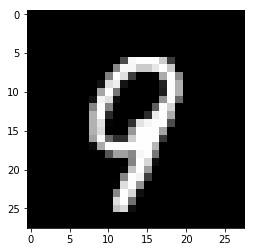

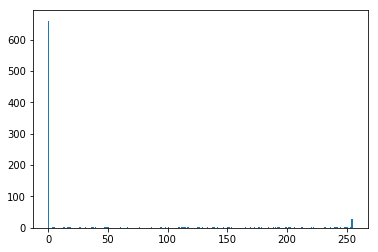

In [12]:
random_idx = np.random.randint(X.shape[0])
hist = np.histogram(X[random_idx], bins=255)[0];
plt.imshow(X[random_idx].reshape(28,28),interpolation="nearest", cmap = plt.cm.Greys_r);
plt.figure();
plt.hist(X[random_idx], bins=255);

we can represent whole images  as hitograms

In [13]:
d_hist = np.zeros((X.shape[0], 255))
for i in range(X.shape[0]):
    d_hist[i] = np.histogram(X[i], bins=255)[0]
print d_hist.shape

(1500, 255)


In [14]:
s = cross_val_score(GaussianNB(), d_hist, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.185 (+/- 0.02276)


In [15]:
s = cross_val_score(RandomForestClassifier(), d_hist, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.189 (+/- 0.01439)


## <span style="color:orange">student</span>: 
- Why histograms are not a proper representation in this task?

# Usamos un PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", GaussianNB()) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.837 (+/- 0.01229)


We can perform tunning about components

In [17]:
n_components = range(10,160,10)
means, stds = [], []
for n in n_components:
    print n,
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", GaussianNB()) ))
    s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]


10 20 30 40 50 60 70 80 90 100 110 120 130 140 150


Text(0.5,1,u'GaussianNB')

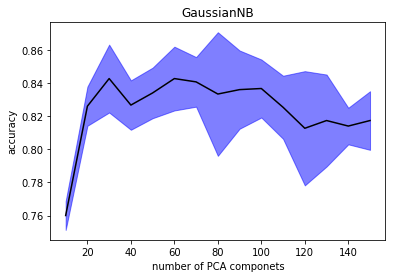

In [18]:
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("GaussianNB")

In [19]:
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", RandomForestClassifier()) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.697 (+/- 0.03065)


In [20]:
n_components = range(10,160,10)
means, stds = [], []
for n in n_components:
    print n,
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", RandomForestClassifier()) ))
    s = cross_val_score(p, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150


Text(0.5,1,u'RandomForestClassifier')

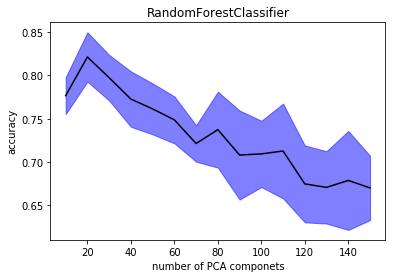

In [21]:
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")

## <span style="color:orange">student</span>: 

- Can we use other image representation?
- What about convolution?

# References

[1] Imagenet: http://www.image-net.org/


[2] Not NMIST: http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html

http://yaroslavvb.com/upload/notMNIST/


---
# <center> Thanks! </center>